### Importação das bibliotecas necessárias

In [1]:
import numpy as np
import time
from tqdm import tqdm


###  Definição da função Escolhida:

In [2]:
def gauss_seidel( A , b , max_iter= 10**6 , x = None , tol = 1.0e-5):
  '''Método de Jacobi no sistema Ax=b'''

  n = len(A)
  if (x == None):
    x0 = [0]*n
  else :
    x0=x.copy()

  err = 1
  num_iter = 0
  while err>tol and num_iter<max_iter:
    err = 0
    for i in range(n):
      y = ( b[i] - sum([A[i][j]*x0[j] for j in range(i) ])\
                  - sum([A[i][j]*x0[j] for j in range(i+1,n) ]) )\
                  /A[i][i]

      err += abs(x0[i] - y)
      x0[i]=y


    num_iter += 1

  if num_iter == max_iter:
    raise Exception("Número máximo de iterações atingido")

  return x0, num_iter


### Inicio da prática

Será cronometrado o tempo de execução da função `gauss_seidel()` em matrizes no range de `1 a 150`

Serão feitas 10 chamadas da função para cada tamanho de matriz e anotado o tempo médio

O tamanho da matriz e seu tempo médio de execução serão salvos em `dados_gauss_seidel=[]` para uso futuro desses dados

In [3]:
dados_gauss_seidel=[]


for i in tqdm(range (1,151)):                       # Fazendo calculo até matrizes de indice 150
    A = np.random.randint(low=-3,high=3,size=(i,i)) # cria uma matriz A de tamanho i para esse laço
    b = np.random.randint(low=-10,high=10,size=i)   # cria uma matriz b de tamanho para esse laço 
    for k in range(i):                              # Força as entradas diagonais a ser maior para poder ser diagonalmente dominante
        A[k][k] = 100

    time_inicio  = time.time()                           # começa o temporizador
    for n in range(10):                                  # executa o codigo calculo 10x:
        gauss_seidel(A,b)[0]                        
    time_fim = time.time()                               # finaliza o tempporizador ao fim do laço for
    dados_gauss_seidel.append([i, (time_fim - time_inicio)/10])          # adiciona o indice e o tempo médio a lista 

dados_gauss_seidel = np.array(dados_gauss_seidel)

for n in range (0, 150):                                 #print dos dados
    print ("Tamanho: ",dados_gauss_seidel[n,0], " Time Médio: ", dados_gauss_seidel[n,1])


    



100%|██████████| 150/150 [02:15<00:00,  1.10it/s]

Tamanho:  1.0  Time Médio:  9.9945068359375e-05
Tamanho:  2.0  Time Médio:  9.992122650146485e-05
Tamanho:  3.0  Time Médio:  0.00010004043579101563
Tamanho:  4.0  Time Médio:  0.0005000591278076172
Tamanho:  5.0  Time Médio:  0.00029954910278320315
Tamanho:  6.0  Time Médio:  0.00039973258972167967
Tamanho:  7.0  Time Médio:  0.000499558448791504
Tamanho:  8.0  Time Médio:  0.000599074363708496
Tamanho:  9.0  Time Médio:  0.0004997730255126953
Tamanho:  10.0  Time Médio:  0.0011991262435913086
Tamanho:  11.0  Time Médio:  0.001598954200744629
Tamanho:  12.0  Time Médio:  0.001099395751953125
Tamanho:  13.0  Time Médio:  0.0015990495681762694
Tamanho:  14.0  Time Médio:  0.0008995532989501953
Tamanho:  15.0  Time Médio:  0.0010990858078002929
Tamanho:  16.0  Time Médio:  0.0020989894866943358
Tamanho:  17.0  Time Médio:  0.0019987344741821287
Tamanho:  18.0  Time Médio:  0.0037979364395141603
Tamanho:  19.0  Time Médio:  0.003098320960998535
Tamanho:  20.0  Time Médio:  0.0037976026535

### Criação dos gráficos de regressão

Coeficientes da Linear:  0.0022323948651495236 -0.07808375552303301
Coeficientes da Quadratica:  [ 3.70997608e-02 -2.31432289e-03  3.01107136e-05]
Coeficientes da Cubica:  [-1.56089000e-02  1.80615104e-03 -3.78829149e-05  3.00192620e-07]
Coeficientes da Quártica:  [ 7.15378049e-03 -1.12131318e-03  4.86846753e-05 -5.89614134e-07
  2.94637998e-09]


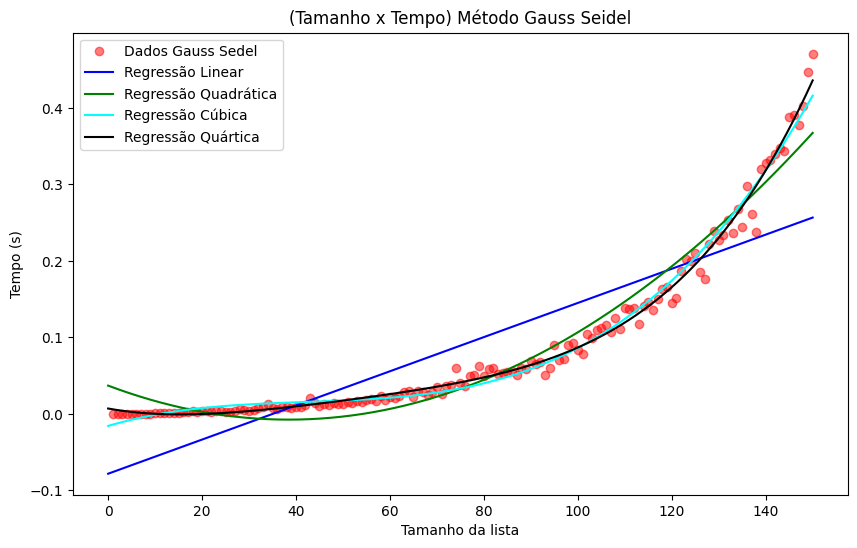

In [4]:
import matplotlib.pyplot as plt

dados = dados_gauss_seidel.copy()
m = dados.shape[0]
dominio = np.linspace(0, 150, 1000)

# ==================== LINEAR =============================== (por fórmula)
x , y = dados[:,0] , dados[:,1]
n = len(x)
soma_x = np.sum(x)
soma_y = np.sum(y)
soma_xy = np.sum(x*y)
soma_x_squared = np.sum(x**2)

coef_a = (n * soma_xy - soma_x * soma_y) / (n * soma_x_squared - soma_x**2)
coef_b = (soma_y - coef_a * soma_x) / n

linear = [coef_a * t + coef_b for t in dominio]

print("Coeficientes da Linear: ", coef_a, coef_b)
#===================== QUADRATICA ============================
# Define a matriz de coeficientes
A = np.zeros((m, 3))
for i in range(m):
    A[i, 0] = 1
    A[i, 1] = dados[i, 0]
    A[i, 2] = dados[i, 0] ** 2

# Define o vetor independente
b = dados[:, 1]
B = A.transpose() @ A
c = A.transpose() @ b
alpha = np.linalg.solve(B, c)

quadratica = [alpha[0] + alpha[1] *t + alpha[2] * t**2  for t in dominio]
print("Coeficientes da Quadratica: ", alpha)

#===================== CUBICA ============================
A = np.zeros((m, 4))
for i in range(m):
    A[i, 0] = 1
    A[i, 1] = dados[i, 0]
    A[i, 2] = dados[i, 0] ** 2
    A[i, 3] = dados[i, 0] ** 3

b = dados[:, 1]
B = A.transpose() @ A
c = A.transpose() @ b
alpha = np.linalg.solve(B, c)

cubica = [alpha[0] + alpha[1] * t + alpha[2] * t ** 2 +alpha[3] * t ** 3 for t in dominio]
print("Coeficientes da Cubica: ", alpha)


#===================== QUARCTICA =========================
A = np.zeros((m, 5))
for i in range(m):
    A[i, 0] = 1
    A[i, 1] = dados[i, 0]
    A[i, 2] = dados[i, 0] ** 2
    A[i, 3] = dados[i, 0] ** 3
    A[i, 4] = dados[i, 0] ** 4
    
b = dados[:, 1]
B = A.transpose() @ A
c = A.transpose() @ b
alpha = np.linalg.solve(B, c)

quartica = [alpha[0] + alpha[1] *t + alpha[2] * t**2 +alpha[3] * t**3 + alpha[4] * t**4   for t in dominio]
print("Coeficientes da Quártica: ", alpha)




# =================== CRIAÇÃO DO GRRÁFICO COM TODAS AS INFORMAÇÕES =============================

fig, axs = plt.subplots(1, 1, figsize=(10, 6))
axs.set_title("(Tamanho x Tempo) Método Gauss Seidel")
axs.set_xlabel("Tamanho da lista")
axs.set_ylabel("Tempo (s)")
dados = dados.transpose()
axs.plot(x, y, 'ro',alpha=0.5, label ='Dados Gauss Sedel')
axs.plot(dominio, linear, 'b',label ='Regressão Linear')
axs.plot(dominio, quadratica, 'green',label ='Regressão Quadrática')
axs.plot(dominio, cubica, 'cyan',label ='Regressão Cúbica')
axs.plot(dominio, quartica, 'black',label ='Regressão Quártica')



plt.legend()
plt.show()




## Conclusões Finais

Como ponderado pelo professor, esse método não apresenta um grau certo de aproximação por regressão, e isso pode ser observado pelo gráfico gerado, entretanto, as regressões cúbicas e quárticas são as que melhor representam a distribuição dos dados neste intervalo.